#                                Playstore Data Analysis   

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
import warnings
warnings.simplefilter('ignore')

#### Make sure you check the link while  reading a CSV fiel

In [133]:
df = pd.read_csv("C:/Users/dell/Desktop/py Module/project 1/playstore-analysis.csv")# Readig a CSV file in to variable called df
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [134]:
df.shape                                                                                              # Size of the Data frame

(10841, 13)

In [135]:
df.describe()                                                                                         # Aggregation Measures 

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [136]:
list(df.columns)                                                                               # Total columns in a Data frame

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

# 1. Data clean up – Missing value treatment

###      a . Drop records where rating is missing since rating is our target/study variable


In [137]:
df.shape

(10841, 13)

In [138]:
df.isnull().sum()                                                               # Total number of missing Values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [139]:
len(df[pd.notnull(df['Rating'])]["Rating"])                                # Rating column has 9367 values , which are not null

9367

In [140]:
len(df[pd.isnull(df['Rating'])]["Rating"])                                 # Rating Column has 1474 null values

1474

In [141]:
df.dropna(subset = ["Rating"]  , inplace = True)                           # Rows which contain null Rating are removed 

In [142]:
df.shape   

(9367, 13)

In [143]:
len(df[pd.isnull(df["Rating"])]["Rating"])                                 # Verified that no null values 

0

In [144]:
df.isnull().sum()                                                          # Null values in each colums / series are modified

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

## b . Check the null values for the Android Ver column

### i. Are all 3 records having the same problem?

In [145]:
df[pd.isnull(df["Android Ver"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [146]:
df["App"][10472]                                                                # index of the 3rd record which is null

'Life Made WI-Fi Touchscreen Photo Frame'

### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [147]:
df.drop ( 10472 , inplace = True  )                                            # Droping the 3rd null value index as mentioned

In [148]:
df[pd.isnull(df["Android Ver"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [149]:
# df.iloc[[10472]]

### iii. Replace remaining missing values with the mode

In [150]:
df["Android Ver"].value_counts()                                                                     # Values in the column

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [151]:
len(df[pd.isnull(df["Android Ver"])]["Android Ver"])

2

In [152]:
df["Android Ver"].fillna(df["Android Ver"].mode()[0] , inplace = True )              # Filled the missing values with mode

In [153]:
len(df[pd.isnull(df["Android Ver"])]["Android Ver"])                                 # Verified that no null values are present 

0

In [154]:
df.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

###  c . Current ver – replace with most common value

In [155]:
df["Android Ver"].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [156]:
len(df[pd.isnull(df["Current Ver"])]["Current Ver"])                                  # 4 null vales 

4

In [157]:
df["Current Ver"].fillna(df["Current Ver"].mode()[0] , inplace = True)               # Most common value is mode

In [158]:
len(df[pd.isnull(df["Current Ver"])]["Current Ver"])                                 # Replaced the null with Mode and verified

0

In [159]:
df.isnull().sum()                                                                    # Null values in columns are modified

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [160]:
df.shape

(9366, 13)

In [161]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

### Reviews , Installs , Price columns need to be brought to numeric type

In [162]:
df["Reviews"].describe()                                               # Current datatype is dtype but it is a numeric column

count     9366
unique    5992
top          2
freq        83
Name: Reviews, dtype: object

###  b . Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [163]:
df["Installs"].value_counts()     

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [164]:
df["Installs"] = df["Installs"].str.replace( "," , "" )

In [165]:
df["Installs"] = df["Installs"].str.replace( "+" , "" )

In [166]:
df.head()                                                            # successfully replaced "," and "+" with ""

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [167]:
df["Installs"] = df["Installs"].astype(int)                                        # convting Installs column to numeric type

In [168]:
df.describe()                                            #  "describe" fcn only display numberic fields . so it  got converted

,Rating,Size,Installs
count,9366.000000,9366.000000,9.366000e+03
mean,4.191757,22705.733753,1.789744e+07
std,0.515219,21305.040123,9.123822e+07
min,1.000000,8.500000,1.000000e+00
25%,4.000000,6600.000000,1.000000e+04
50%,4.300000,21000.000000,5.000000e+05
75%,4.500000,27000.000000,5.000000e+06
max,5.000000,100000.000000,1.000000e+09


###  c . Price variable – remove $ sign and convert to float

In [169]:
df["Price"] = df["Price"].str.replace ( "$" , "")                                       # Replacing "$" with ""

In [170]:
df["Price"] = df["Price"].str.replace("Everyone" , "")                                  # Replacing "Everyone"  with ""

In [171]:
df["Price"] = df["Price"].astype(float)                                                 # Converting Price column to float

In [172]:
df["Price"] = df["Price"].astype(int)                                                   #  Converting Price column to int

In [173]:
df.describe()                                                                          #  Successfully Converted the Price colum

,Rating,Size,Installs,Price
count,9366.000000,9366.000000,9.366000e+03,9366.000000
mean,4.191757,22705.733753,1.789744e+07,0.898890
std,0.515219,21305.040123,9.123822e+07,15.766019
min,1.000000,8.500000,1.000000e+00,0.000000
25%,4.000000,6600.000000,1.000000e+04,0.000000
50%,4.300000,21000.000000,5.000000e+05,0.000000
75%,4.500000,27000.000000,5.000000e+06,0.000000
max,5.000000,100000.000000,1.000000e+09,400.000000


In [174]:
df["Reviews"] = df["Reviews"].astype(int)                       # Converting the "Reviews" column to numeric

In [175]:
df.describe()                                                   # Successfully converted the 3 columns into the numeric fields

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.898890
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.766019
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


## 3 . Sanity checks – check for the following and handle accordingly

###  a . Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
###  i .  Are there any such records? Drop if so.


In [176]:
df.describe()                                                                     #  Avg Rating is 4.1 and max Rating is 5 .

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.898890
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.766019
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


###### Since   AVG   Rating   is   between   1 and 5    and   Max   Rating   is   5  ,   no   need   to   drop   any   Records

In [177]:
len(df[df["Rating"]>5]["Rating"])                                                   # No records with Rating > 5

0

## b . Reviews should not be more than installs as only those who installed can review the  app.
###  i .  Are there any such records? Drop if so.

In [178]:
df[df["Reviews"]>df["Installs"]]                                         # There exists the Records 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [179]:
len(df[df["Reviews"]>df["Installs"]])                                # There are 7 records with "Reviews" > "Installs"

7

In [180]:
a = list(df[df["Reviews"]>df["Installs"]].index.values)              # Index Values of those records
a

[2454, 4663, 5917, 6700, 7402, 8591, 10697]

In [181]:
df.drop( a , inplace = True )                                       # Dropping those Records

In [182]:
len(df[df["Reviews"]>df["Installs"]])                               # Successfully Dropped the Records

0

In [183]:
df.shape                                                            # Total Records got Updated

(9359, 13)

## 4  . Identify and handle outliers – 

###  a  . Price column

In [184]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###  i  . Make suitable plot to identify outliers in price

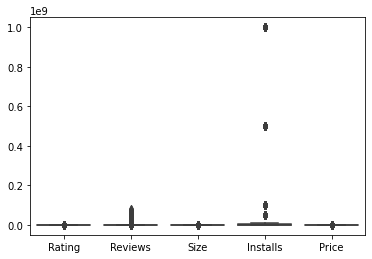

In [185]:
sns.boxplot(data = df );                                            # Outliers in the Data frame

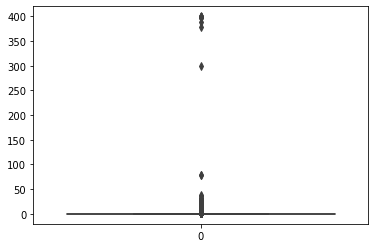

In [186]:
sns.boxplot(data = df["Price"] );                                    # There exists the outliers

### ii  .   Do you expect apps on the play store to cost $200? Check out these cases?


### No ,  Becauses  from  the  Box Plot  we  can  notice  that  very few users  purchased  
### the apps   with   the  price  greater  than  $50

In [187]:
len(df[df["Price"]<30])

9338

### iii  .   After dropping the useless records, make the suitable plot again to identify  outliers
### iv  .  Limit data to records with price < $30


In [188]:
len(df[df["Price"]>=30])                            # only 21 purchases are observed with the  price  Greater  than 30

21

In [189]:
a = list(df[df["Price"]>=30].index.values)        # These are the indexes of the records who purchased the app with price > 30
a

[2253,
 2301,
 2365,
 2402,
 2414,
 4197,
 4362,
 4367,
 5351,
 5354,
 5355,
 5356,
 5357,
 5358,
 5359,
 5360,
 5362,
 5364,
 5366,
 5369,
 5373]

In [190]:
df.drop( a , inplace = True )                        

In [191]:
len(df[df["Price"]>=30])                                         #  successfully dropped the the records 

0

In [192]:
df.shape

(9338, 13)

### b .  Reviews column


In [193]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### i  .   Make suitable plot

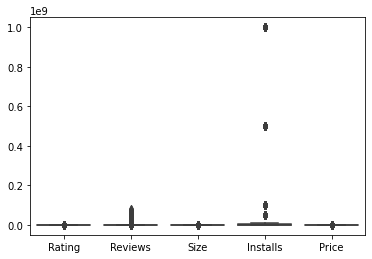

In [194]:
sns.boxplot( data = df) ;

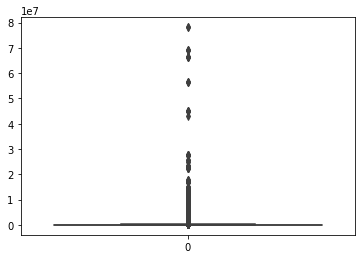

In [195]:
sns.boxplot( data = df["Reviews"]) ;                  # Box plot is suitable for identifying outliers in a data 

### ii  .   Limit data to apps with < 1 Million reviews

In [196]:
len(df[df["Reviews"]>=1000000])                                     # There are 704 records whose "Reviews" > 1M

704

In [197]:
len(df[df["Reviews"]<1000000])

8634

In [198]:
a = list(df[df["Reviews"]>=1000000].index.values)                  #  Indexes whose "Reviews" > 1M

In [199]:
df.drop( a , inplace = True )

In [200]:
len(df[df["Reviews"]>=1000000])                                   #  Successfully dropped the records 

0

In [201]:
df.shape

(8634, 13)

In [202]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8634.000000,8634.000000,8634.000000,8.634000e+03,8634.000000
mean,4.172492,68383.348853,21636.459060,4.288536e+06,0.260366
std,0.528913,156335.806417,20663.668474,2.864650e+07,1.582318
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,4.000000,143.250000,6000.000000,1.000000e+04,0.000000
50%,4.300000,3641.000000,18000.000000,1.000000e+05,0.000000
75%,4.500000,46070.500000,26000.000000,1.000000e+06,0.000000
max,5.000000,995002.000000,100000.000000,1.000000e+09,29.000000


### c  .   Installs

###  i  .   What is the 95th percentile of the installs?

In [203]:
np.percentile( df["Installs"] , 95 )                             # 95 percentile of the Installs are less than or 10M .

10000000.0

In [204]:
df["Installs"].quantile(0.95)

10000000.0

### ii  .   Drop records having a value more than the 95th percentile

In [205]:
len(df[df["Installs"]>np.percentile( df["Installs"] , 95 )])     #  199  records exist whose value more than the 95th percentile

199

In [206]:
len(df[df["Installs"]<=np.percentile( df["Installs"] , 95 )])

8435

In [207]:
a = list(df[(df["Installs"])>(np.percentile( df["Installs"] , 95 ))].index.values)
print(len(a))

199


In [208]:
df.drop( a , inplace = True)                                      # Successfully dropped the records

In [209]:
len(df[df["Installs"]>np.percentile( df["Installs"] , 95 )])                                                    

0

# Data analysis to answer business questions

## 5  .  What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

##  a  .   How do you explain this?


###  From the below plot we can notice  that  the  data is   negitively  skewed , which means  More skewed  towards Higher values .  


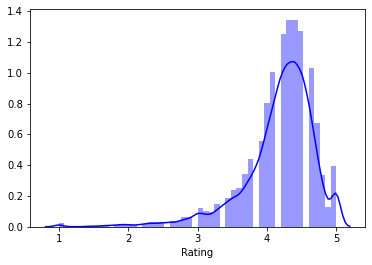

In [210]:
sns.distplot( df["Rating"] , color = "B" );

##  b  .   What is the implication of this on your analysis?

### Majority  of  the  users  "Rating"  is  between  4 and   4.5   .  This may  happen  due  to  quality  
### of  the  games   which  arere  available  in  the  PLAY STORE  .   Quality  refers to the  user 
### friendlyness  ,  less bugs  ,  Highly Realistic  , compatability  etc....

## 6  .   What are the top Content Rating values?

### Top content Rating Values are "Everyone"   and   "Teen"

In [211]:
df["Content Rating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### a  .   Are there any values with very few records?
### b  .   If yes, drop those as they won’t help in the analysis


### Yes ,     Very  few  Records   corresponding  to  "Unrated"   and   "Adults only 18+"   categories  exist .

In [212]:
df[df["Content Rating"] == "Unrated"]                                     #   only 1 record exist with this category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.0,50000,Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [213]:
df[df["Content Rating"] == "Adults only 18+"]                            #  only  3 records  exists with  this category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [214]:
df.shape

(8435, 13)

In [215]:
df.drop([ 298 , 3043 , 6424 , 8266] , inplace = True )

In [216]:
df.shape                                                            # Successfully  dropped  the  4 records

(8431, 13)

## 7  . Effect of size on rating

### a  .   Make a joinplot to understand the effect of size on rating

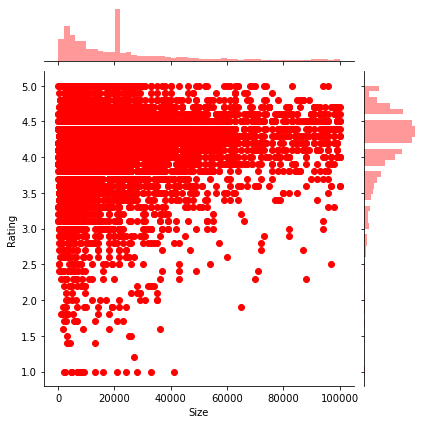

In [217]:
sns.jointplot( x = "Size" ,y = "Rating" ,  data = df , kind = "scatter" , color = "R" , height = 6   );

### b  . Do you see any patterns?
### c  .  How do you explain the pattern?
### Yes ,  We can notice that  when the  size of  the  applications  are  increasing  ,   Rating  is  decresing  .  

###  Especially  when  the  size  is  greater  than  20K  ,  we  can  observe  the  declination  of   Reviews  

# 8. Effect of price on rating

### a  .   Make a jointplot (with regression line)
### b  . What pattern do you see?

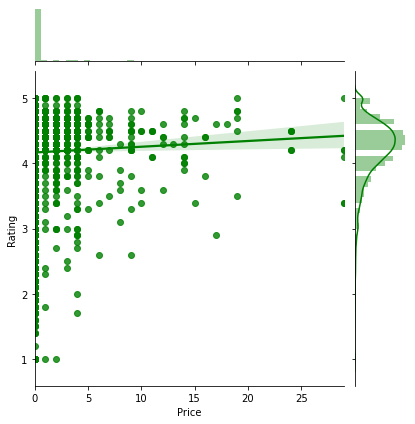

In [218]:
sns.jointplot( x = "Price" , y = "Rating" ,  data = df , kind = "reg" , color = "G" , height = 6 ,);


### c  . How do you explain the pattern?

### Yes ,  We can notice that  when the  Price of  the  applications  are  increasing  ,   Rating  is  decresing  .  

###  Especially  when  the  Price  is  greater  than  5$  ,  we  can  observe  the  declination  of   Reviews

### But we can also notice that the apps whose price is slightly  greater or equal  to  zero  has both high and low ratings 

### d  .   Replot the data, this time with only records with price > 0 

In [219]:
len(df[df["Price"] > 0])                                      #  only 7916  records are present  with Price = 0 

515

In [221]:
len(df[df["Price"] == 0]) 

7916

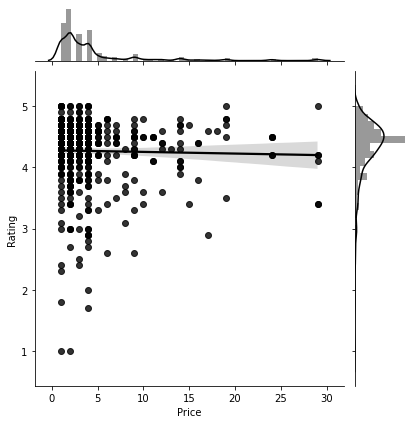

In [90]:
sns.jointplot( x = "Price" , y = "Rating" , data = df[df["Price"]>0] , kind = "reg"  , color = "Black");

### e. Does the pattern change?
### We can notice a slight change .  But still  we  can  see  that  when the Price of  the  applications  are  increasing  ,   Rating  is  decresing  .  

###  Especially  when  the  Price  is  greater  than  5$  ,  we  can  observe  the  declination  of   Reviews

### f  .  What is your overall inference on the effect of price on the rating

### My overall conclusion on the effect of price on the rating  is  when  apps  prices are too low (slightly greater than zero)  then we can notice that  there  are  approximately  equal  amount of  Higher  and  Lower  Ratings .

### But  when  the  apps  prices  are  greater than  1 and less than  5  units  ,  we can observe  increase  in  Higher Ratings and decrease  in lower Ratings . 

## 9  . Look at all the numeric interactions together – 
### a . Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

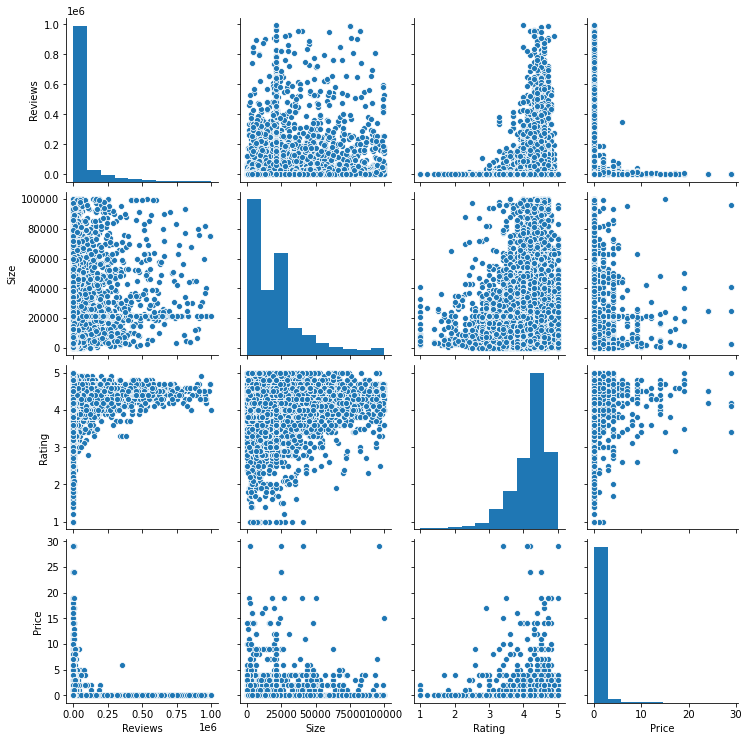

In [91]:
sns.pairplot(  df[["Reviews","Size","Rating","Price"]] );

## 10. Rating vs. content rating

### a . Make a bar plot displaying the rating for each content rating
### b . Which metric would you use? Mean? Median? Some other quantile?
### c . Choose the right metric and plot

In [92]:
df["Content Rating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

### I choose "Mean" beacuse number of records belonging to each category under "Content Rating" are
 

### not  equal . So mode or median may mislead us . 

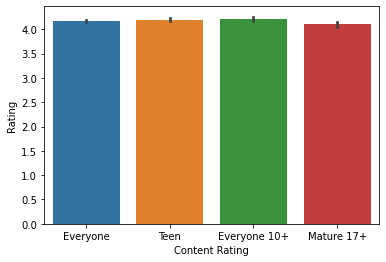

In [93]:
sns.barplot( x = "Content Rating" , y = "Rating" , data = df , estimator = np.mean ); 

## 11 . Content rating vs. size vs. rating – 3 variables at a time

### a . Create 5 buckets (20% records in each) based on Size

In [94]:
Bins = [0 , 20000 , 40000 , 60000 , 80000 , 100000]
df["Buckets"] = pd.cut( df["Size"] , Bins , labels = [ "0-20K" , "20-40K " , "40-60K" , "60-80K" , "80-100K" ])

In [95]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0-20K
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0-20K
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0-20K
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0-20K
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0-20K


### b . By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [96]:
 pd.pivot_table ( df , index = "Buckets" , columns = "Content Rating" , values = "Rating")

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Buckets,,,,
0-20K,4.145730,4.247561,4.010582,4.182240
20-40K,4.200195,4.169811,4.156291,4.170432
40-60K,4.167083,4.263636,4.190476,4.237383
60-80K,4.245408,4.280769,4.200000,4.274194
80-100K,4.260127,4.304762,4.252632,4.270313


In [97]:
df1 = pd.pivot_table ( df , index = "Buckets" , columns = "Content Rating" , values = "Rating" , 
                aggfunc =  lambda x : np.percentile( x , 20))
df1                                                         #  Rating (20th percentile) of each combination in "Content Rating"

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Buckets,,,,
0-20K,3.80,4.02,3.5,3.9
20-40K,4.00,4.00,4.0,3.9
40-60K,3.90,4.06,4.1,4.0
60-80K,4.00,4.00,4.0,4.0
80-100K,4.04,4.10,4.0,4.0


### c. Make a heatmap of this
## i. Annotated
## ii. Greens color map

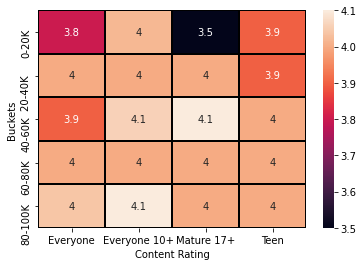

In [98]:
sns.heatmap( df1 , annot = True , linecolor = "Black" , linewidths = 1  );

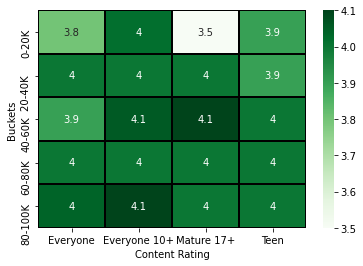

In [99]:
sns.heatmap( df1 , annot = True , linecolor = "Black" , linewidths = 1 , cmap = "Greens" );

### d . What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

###  My inference is that I think users are not prefering  the apps  based on its size . Because  from  the 
### above plot  we  can notice that though  the app size  is  between  80 - 100K  there are 
### 4 and 4.1 ratings .  so users are choosing apps based on their convenience . 

# -------------------------------------------  THANKYOU  ----------------------------------------------